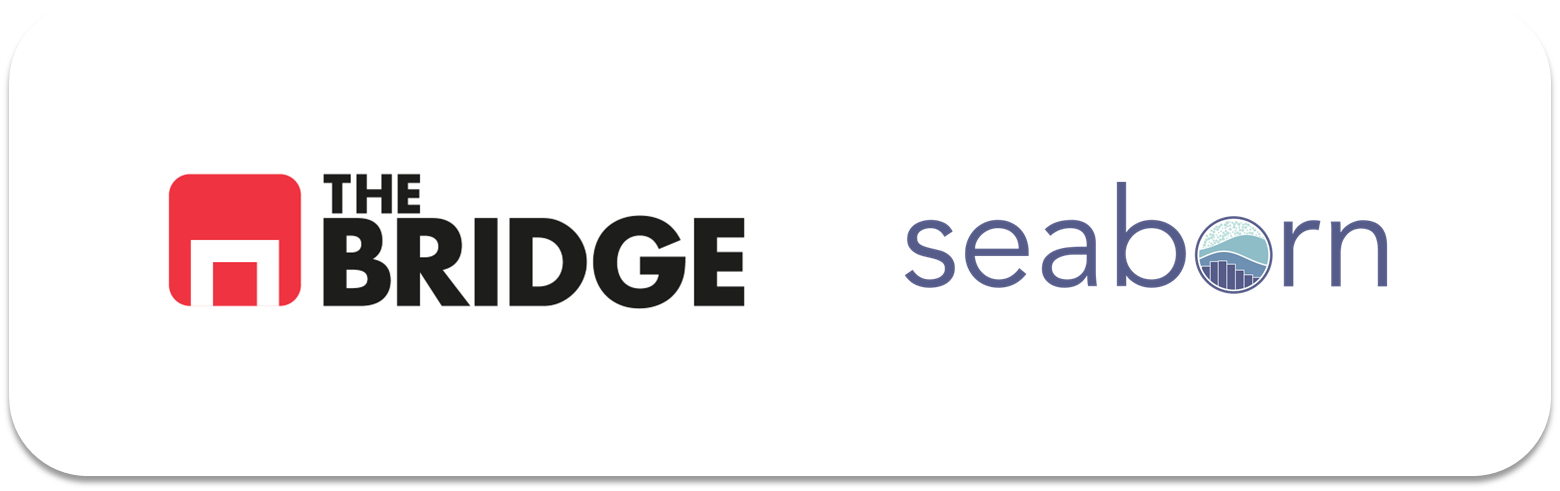

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns   

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [19]:
df = pd.read_csv('./data/california_cities.csv')
df = df.dropna()
print(df.sample(100))


     Unnamed: 0           city       latd       longd  elevation_m  \
331         331  PortolaValley  37.375000 -122.218611        140.0   
395         395      SantaRosa  38.448611 -122.704722         50.0   
16           16   ArroyoGrande  35.120833 -120.586667         36.0   
44           44       Bradbury  34.149444 -117.974444        206.0   
46           46           Brea  33.923333 -117.888889        110.0   
..          ...            ...        ...         ...          ...   
24           24         Avenal  36.004167 -120.128889        246.0   
92           92         Corona  33.866667 -117.566667        206.0   
29           29        Barstow  34.900000 -117.016667        664.0   
59           59      Camarillo  34.233333 -119.033333         54.0   
135         135        Fairfax  37.987222 -122.588889         35.0   

     elevation_ft  population_total  area_total_sq_mi  area_land_sq_mi  \
331         459.0              4353             9.093            9.092   
395        

### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

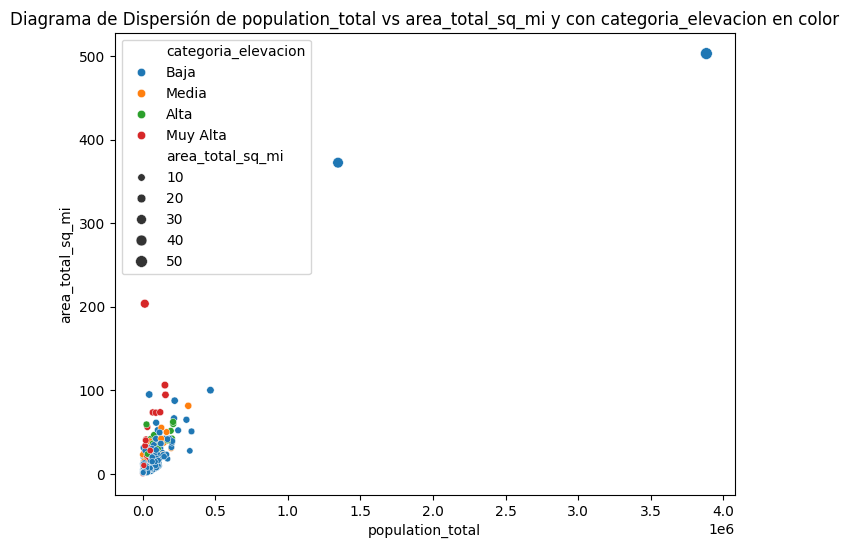

In [41]:
# Creo una columan categorica apartir de la elevación:
bins = [-float('inf'), 500, 1000, 2000, float('inf')]
labels = ['Baja', 'Media', 'Alta', 'Muy Alta']
df['categoria_elevacion'] = pd.cut(df['elevation_ft'], bins=bins, labels=labels)

def pintar_diagrama_dispersion(df, num_col1, num_col2, cat_col=None, size=5, escala=1):
   # Verificar si size es una cadena (nombre de columna)
    if isinstance(size, str):
        if size in df.columns:
            sizes = df[size] * escala
        else:
            raise KeyError(f"La columna '{size}' no existe en el DataFrame.")
    else:
        sizes = size

    # Graficar el diagrama de dispersión
    plt.figure(figsize=(8, 6))
    
    if cat_col:
        sns.scatterplot(data=df, x=num_col1, y=num_col2, hue=cat_col, size=sizes)
    else:
        sns.scatterplot(data=df, x=num_col1, y=num_col2, size=sizes)
    
    plt.title(f'Diagrama de Dispersión de {num_col1} vs {num_col2} {(f"y con {cat_col} en color") if cat_col else ""}')
    plt.xlabel(num_col1)
    plt.ylabel(num_col2)
    plt.show()

# Pintar diagrama de dispersión
try:
    pintar_diagrama_dispersion(df, 'population_total', 'area_total_sq_mi', cat_col='categoria_elevacion', size='area_total_sq_mi', escala=1/10)
except KeyError as e:
    print(e)


### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

C:\Users\Pablo\AppData\Local\Temp\ipykernel_2744\1591297540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cities_cleaned['log_poblacion'] = np.log10(df_cities_cleaned['population_total'])


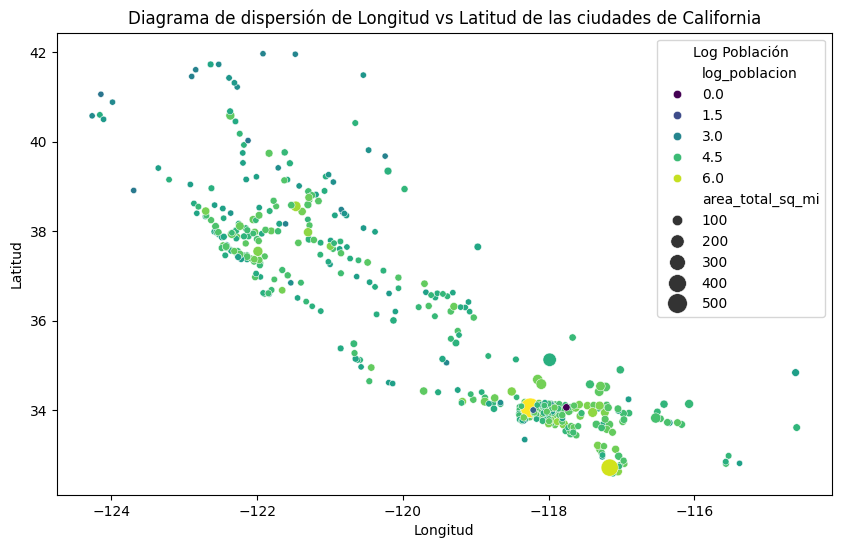

In [42]:
df_cities_cleaned['log_poblacion'] = np.log10(df_cities_cleaned['population_total'])
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cities_cleaned,
    x='longd',
    y='latd',
    size='area_total_sq_mi',
    hue='log_poblacion',
    palette='viridis',
    sizes=(20, 200)
)
plt.title('Diagrama de dispersión de Longitud vs Latitud de las ciudades de California')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Log Población')
plt.show()


Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

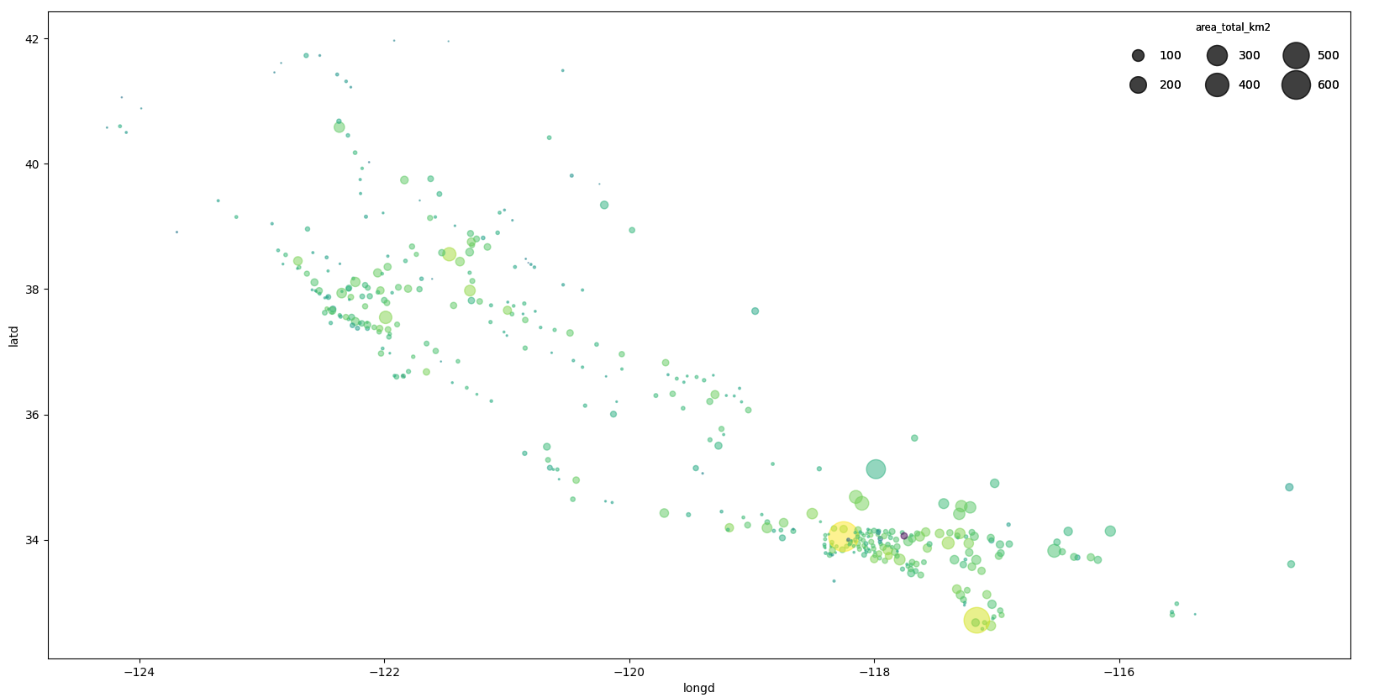

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [45]:
df_titanic= pd.read_csv('./data/titanic.csv')
print(df_titanic.sample(100))

     survived  pclass     sex    age  sibsp  parch     fare embarked   class  \
634         0       3  female   9.00      3      2  27.9000        S   Third   
279         1       3  female  35.00      1      1  20.2500        S   Third   
553         1       3    male  22.00      0      0   7.2250        C   Third   
603         0       3    male  44.00      0      0   8.0500        S   Third   
488         0       3    male  30.00      0      0   8.0500        S   Third   
..        ...     ...     ...    ...    ...    ...      ...      ...     ...   
692         1       3    male    NaN      0      0  56.4958        S   Third   
782         0       1    male  29.00      0      0  30.0000        S   First   
344         0       2    male  36.00      0      0  13.0000        S  Second   
803         1       3    male   0.42      0      1   8.5167        C   Third   
628         0       3    male  26.00      0      0   7.8958        S   Third   

       who  adult_male deck  embark_tow

C:\Users\Pablo\AppData\Local\Temp\ipykernel_2744\336835039.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_titanic, x='alive', palette='coolwarm')


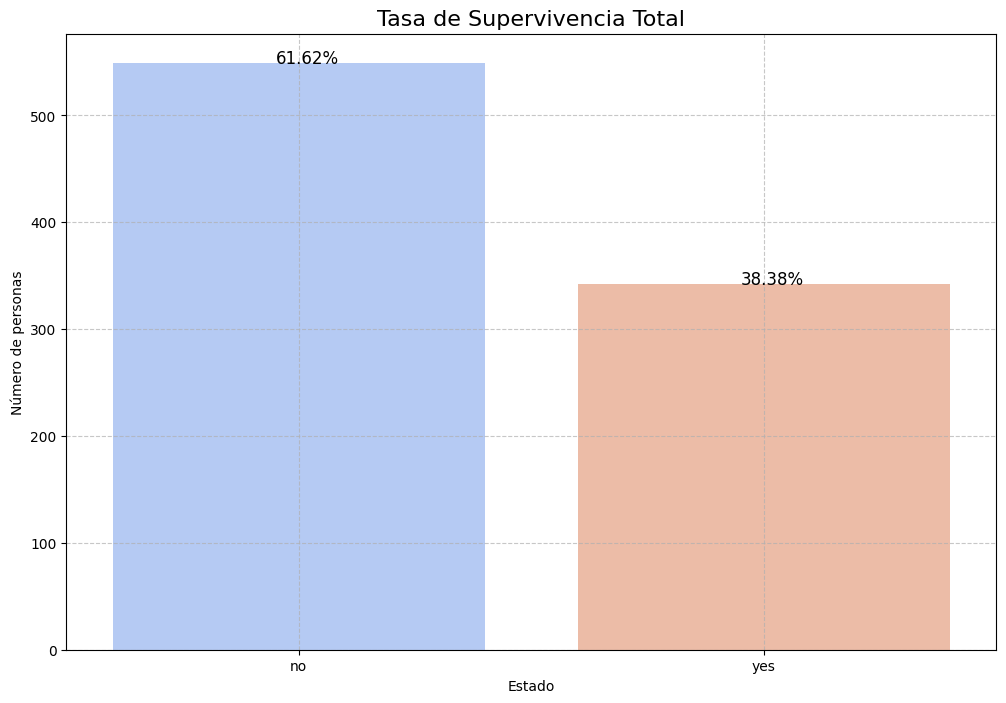

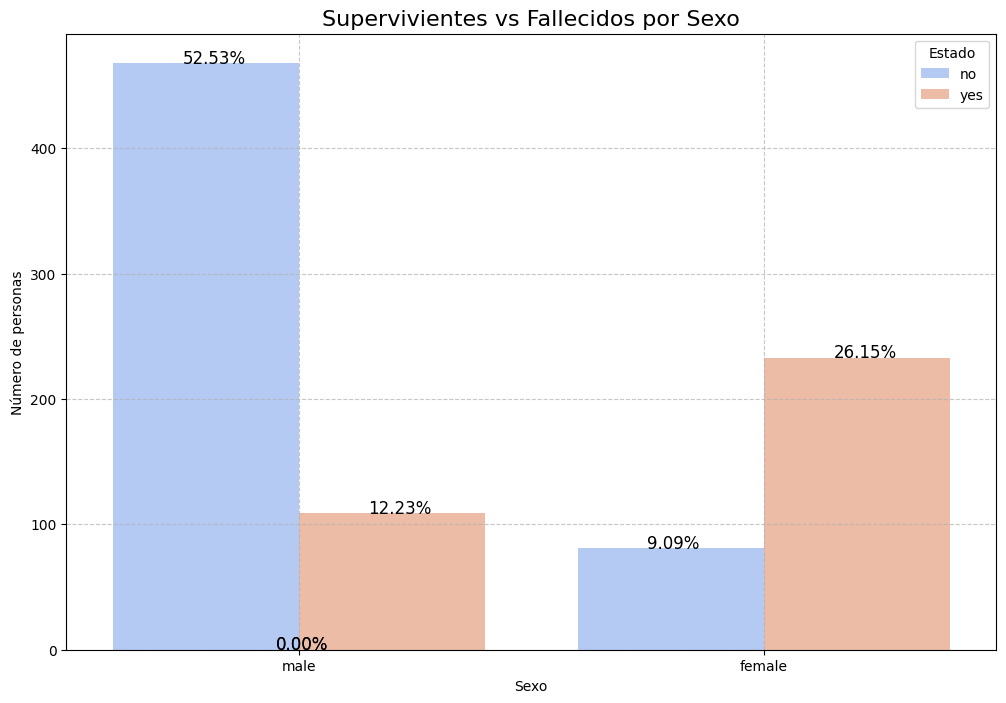

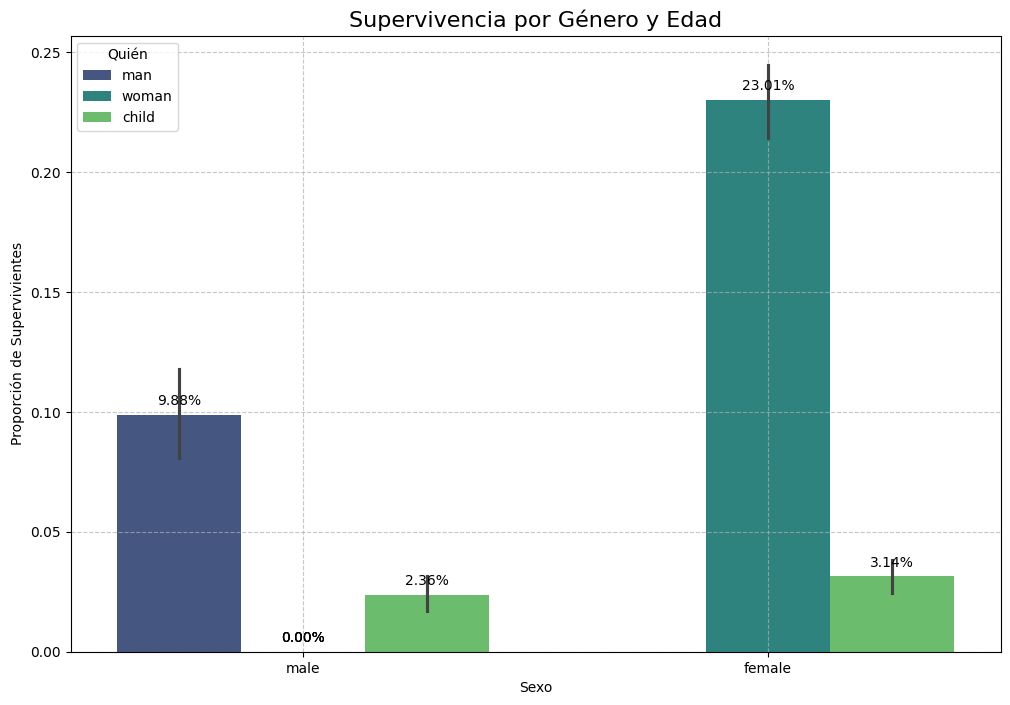

C:\Users\Pablo\AppData\Local\Temp\ipykernel_2744\336835039.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_titanic, x='class', y='survived', palette='magma', estimator=lambda x: sum(x) / len(df_titanic))


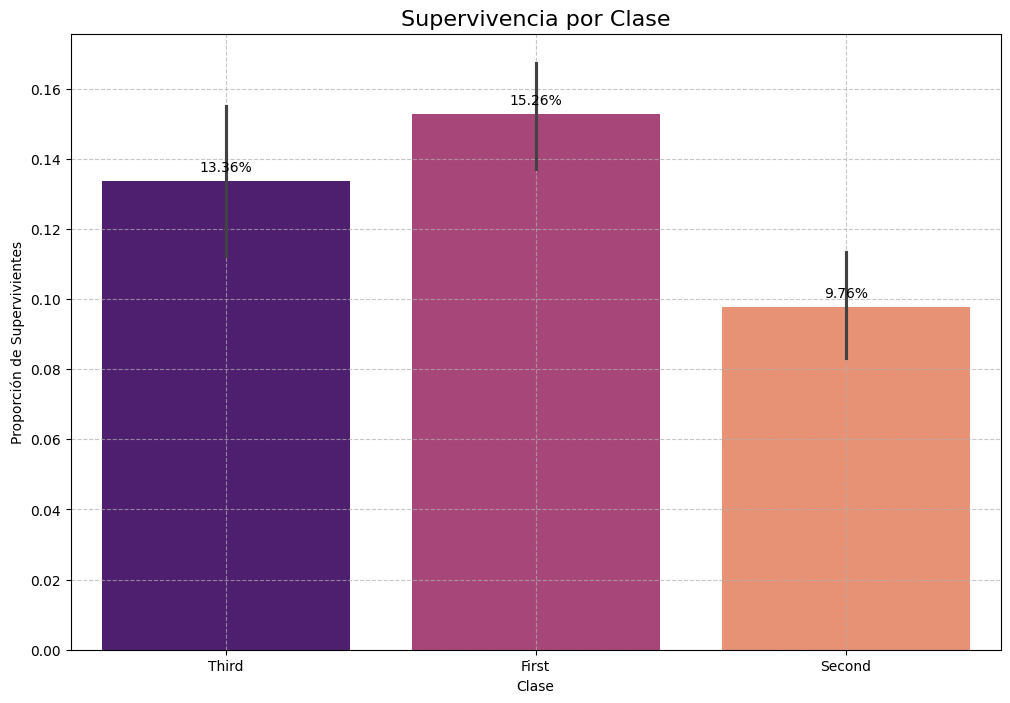

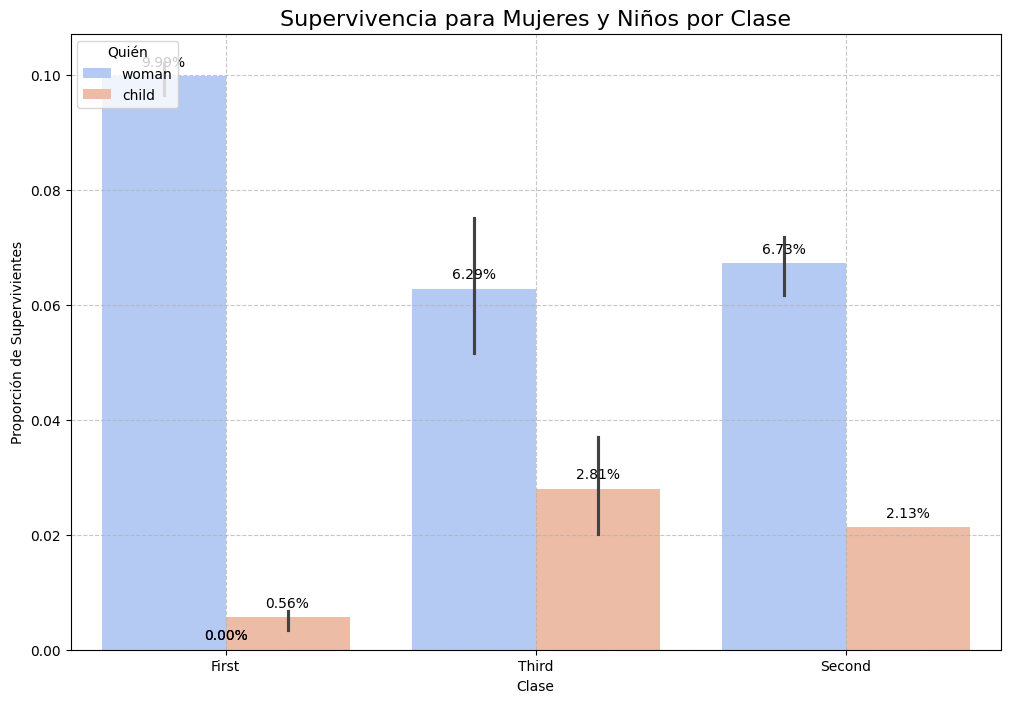

C:\Users\Pablo\AppData\Local\Temp\ipykernel_2744\336835039.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_titanic, x='embark_town', y='survived', palette='Set2', estimator=lambda x: sum(x) / len(df_titanic))


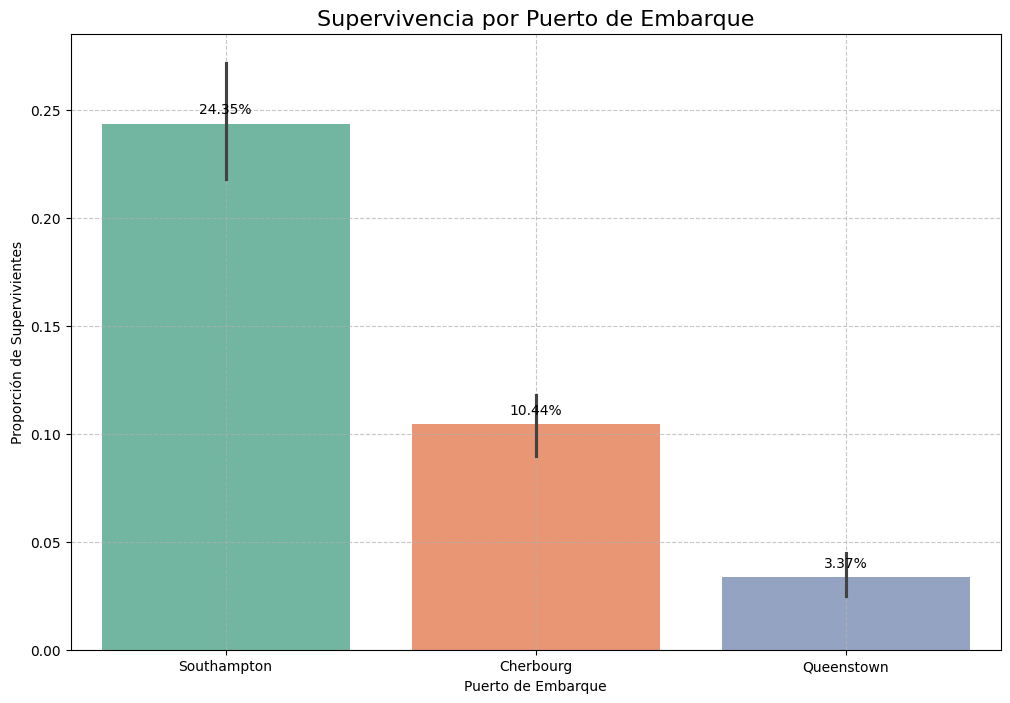

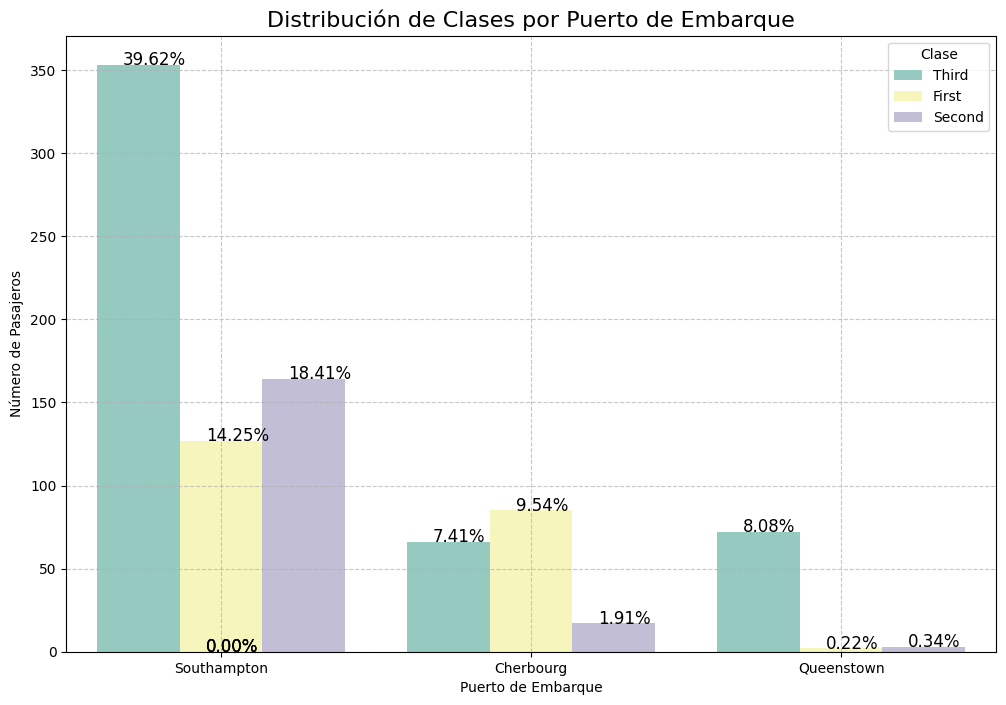

In [55]:
def add_value_labels(ax, spacing=5):
    """Agregar etiquetas de valor a las barras de los gráficos."""
    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate(f'{height:.2%}', xy=(rect.get_x() + rect.get_width() / 2, height), 
                    xytext=(0, spacing), textcoords='offset points', ha='center', va='bottom')

# Tasa de Supervivencia Total
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df_titanic, x='alive', palette='coolwarm')
total = len(df_titanic)
for p in ax.patches:
    percentage = f'{(p.get_height() / total * 100):.2f}%'
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), fontsize=12, color='black')
plt.title('Tasa de Supervivencia Total', fontsize=16)
plt.xlabel('Estado')
plt.ylabel('Número de personas')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Supervivientes vs Fallecidos por Sexo
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df_titanic, x='sex', hue='alive', palette='coolwarm')
total = len(df_titanic)
for p in ax.patches:
    percentage = f'{(p.get_height() / total * 100):.2f}%'
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), fontsize=12, color='black')
plt.title('Supervivientes vs Fallecidos por Sexo', fontsize=16)
plt.xlabel('Sexo')
plt.ylabel('Número de personas')
plt.legend(title='Estado', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Supervivencia por Género y Edad
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_titanic, x='sex', y='survived', hue='who', palette='viridis', estimator=lambda x: sum(x) / len(df_titanic))
ax.set_ylabel('Porcentaje de Supervivientes')
add_value_labels(ax)
plt.title('Supervivencia por Género y Edad', fontsize=16)
plt.xlabel('Sexo')
plt.ylabel('Proporción de Supervivientes')
plt.legend(title='Quién', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Supervivencia por Clase
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_titanic, x='class', y='survived', palette='magma', estimator=lambda x: sum(x) / len(df_titanic))
ax.set_ylabel('Porcentaje de Supervivientes')
add_value_labels(ax)
plt.title('Supervivencia por Clase', fontsize=16)
plt.xlabel('Clase')
plt.ylabel('Proporción de Supervivientes')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Supervivencia para Mujeres y Niños por Clase
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_titanic[df_titanic['who'].isin(['woman', 'child'])], x='class', y='survived', hue='who', palette='coolwarm', estimator=lambda x: sum(x) / len(df_titanic))
ax.set_ylabel('Porcentaje de Supervivientes')
add_value_labels(ax)
plt.title('Supervivencia para Mujeres y Niños por Clase', fontsize=16)
plt.xlabel('Clase')
plt.ylabel('Proporción de Supervivientes')
plt.legend(title='Quién', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Supervivencia por Puerto de Embarque
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_titanic, x='embark_town', y='survived', palette='Set2', estimator=lambda x: sum(x) / len(df_titanic))
ax.set_ylabel('Porcentaje de Supervivientes')
add_value_labels(ax)
plt.title('Supervivencia por Puerto de Embarque', fontsize=16)
plt.xlabel('Puerto de Embarque')
plt.ylabel('Proporción de Supervivientes')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Distribución de Clases por Puerto de Embarque
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df_titanic, x='embark_town', hue='class', palette='Set3')
total = len(df_titanic)
for p in ax.patches:
    percentage = f'{(p.get_height() / total * 100):.2f}%'
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), fontsize=12, color='black')
plt.title('Distribución de Clases por Puerto de Embarque', fontsize=16)
plt.xlabel('Puerto de Embarque')
plt.ylabel('Número de Pasajeros')
plt.legend(title='Clase', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
